# Text Mining, Tech Giant Reviews using Natural Language Processing 

## Introduction 


More than 70% of potentially usable data exists in unstructured form. This data is stored in text format. Text mining or Natural language processing provides us with techniques to gain actionable insights from these data. 



## Problem Statement


Human Resource Analytics:  The HR department of Amazon wants to develop strategies for hiring appropriate talent and prospective employees who are more suited to their work culture. They also want to understand what distinguishes Amazon employees with Google employees, which is another technology giant. 
The Data Scientists from Springboard have been asked to explore online reviews and provide insights. 

In [4]:
from IPython.display import Image
from IPython.core.display import HTML 

![](figures/1.png)

## Datasets for this study

**Amazon and Google Reviews**. (500+ and 500-ve reviews) Several employees from both companies submit online reviews. These are categorized into positive and negative reviews. Four data sets are available for analysis. Resource: Datacamp  (Ted Kwartler) https://www.datacamp.com/courses/intro-to-text-mining-bag-of-words

## Questions to be addressed through text mining

  
* What are employees saying about Amazon and Google? 
    
* Which company has better work-life balance? 

* Which company is perceived better in compensating according to the online reviews? 

* Can HR use the analyses in strategizing their talent hunt? Recommendations to the HR team. 



## Methods / Steps used to answer the above questions 


1. Organization & Text pre-processing (raw text -> sentence segmentation -> tokenization -> corpus -> matrix -> word count)

2. Feature extraction and Analysis (TF, DTM, TF-ID, TF-IDF, DM -> Top terms & Word associations) 

3. Machine Learning (clustering, classification, association rules, predictive modeling) to predict reviews. 

4. Data visualization: Dendrograms for word relationships, Word clouds. Pyramid plots for comparison of words used in reviews.

## Summary 

### Preprocessing or Feature extraction

- Use bag of words to preprocess:

     a) convert the tokens into lower case, 
    
     b) Create a counter to count 20 most common words). 
    
     c) Lemmatization and Stemming, 
     
     d) Tokenization

          i)   Tokenize the first sentence. 
          ii)  Tokenize words in the first sentence. 
          iii) Tokenize all the words in the entire google pros column and create a set. 

     d) Removing stop words, punctuation, and unwanted tokens.
     
    
- Using Bag of words to construct countvectorizer and TF-IDF matrix.  (unigrams, bigrams) 

### Data Visualization

- Make a word cloud. Comparison Clouds between pros and cons reviews. 

- Dendrograms to see associations between two words: (long working hours and poor work-life balance in the reviews). 

- Word associations. 

- Pyramids plots to compare bigrams between Google vs Amazon reviews.

### Machine Learning

- Machine Learning to classify pros and cons reviews using Logistic Regression, Multinomial Niave Bayes & Random Forest models. (SVM)

- Understanding the strong predictors from review articles. 

- Making predictions whether new reviews are pros or cons. 

- Conclusions about text analysis. 



# Importing, Cleaning and Exploring the Data sets 

In [5]:
# Importing libraries and packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#plt.rcParams['figure.figsize'] = [20,10]
import seaborn as sns
%matplotlib inline

In [6]:
# reading the 500_amzn.csv file 
amazon_rev = pd.read_csv('500_amzn.csv')

In [7]:
# reading the 500_goog.csv file 
google_rev = pd.read_csv('500_goog.csv')

In [8]:
# what is the type of the data? 
type(amazon_rev)

pandas.core.frame.DataFrame

In [9]:
# looking at the shape of the amazon_rev
amazon_rev.shape

(500, 4)

In [10]:
# looking at the shape of the google_rev
google_rev.shape

(501, 4)

In [11]:
# Looking at the first 5 rows of the amazon_rev
amazon_rev.head()

,pg_num,url,pros,cons
0,50.0,https://www.glassdoor.com/Reviews/Amazon-com-R...,You're surrounded by smart people and the proj...,Internal tools proliferation has created a mes...
1,50.0,https://www.glassdoor.com/Reviews/Amazon-com-R...,Brand name is great. Have yet to meet somebody...,not the most stimulating work. Good brand name...
2,50.0,https://www.glassdoor.com/Reviews/Amazon-com-R...,Good money.Interaction with some great minds i...,No proper growth plan for employees.Difficult ...
3,50.0,https://www.glassdoor.com/Reviews/Amazon-com-R...,nice pay and overtime and different shifts,didn't last quite long enough
4,50.0,https://www.glassdoor.com/Reviews/Amazon-com-R...,Opportunity for those not afraid to work!,Opportunity takes time up to two plus years!


In [12]:
# getting details about the columns and column types. 
amazon_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
pg_num    497 non-null float64
url       497 non-null object
pros      496 non-null object
cons      497 non-null object
dtypes: float64(1), object(3)
memory usage: 15.7+ KB


In [13]:
# Looking at the first 5 rows of the google_rev. 
google_rev.head()

,pg_num,url,pros,cons
0,1,https://www.glassdoor.com/Reviews/Google-Revie...,"* If you're a software engineer, you're among ...","* It *is* becoming larger, and with it comes g..."
1,1,https://www.glassdoor.com/Reviews/Google-Revie...,"1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...
2,1,https://www.glassdoor.com/Reviews/Google-Revie...,You can't find a more well-regarded company th...,I live in SF so the commute can take between 1...
3,1,https://www.glassdoor.com/Reviews/Google-Revie...,- You drive yourself here. If you want to grow...,- Google is a big company. So there are going ...
4,1,https://www.glassdoor.com/Reviews/Google-Revie...,"Teamwork, always someone who can help, competi...",not family-friendly now that I have kids - I d...


In [14]:
# getting details about the columns and column types.
google_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 4 columns):
pg_num    501 non-null int64
url       501 non-null object
pros      501 non-null object
cons      500 non-null object
dtypes: int64(1), object(3)
memory usage: 15.7+ KB


In [15]:
# Creating pros and con reviews google and amazon reviews 
google_pros = google_rev['pros']
amazon_pros = amazon_rev['pros']
google_cons = google_rev['cons']
amazon_cons = amazon_rev['cons']

Cleaning the 3 columns: amazon_pros, google_cons, amazon_cons to drop the NAs  (https://stackoverflow.com/questions/46105180/typeerror-expected-string-or-bytes-like-object-with-python-nltk-word-tokenize)


In [16]:
# Dropping NA from the columns. 
amazon_pros.dropna(inplace=True)
google_cons.dropna(inplace=True)
amazon_cons.dropna(inplace=True)

In [17]:
# Looking at the shape of the columns. 
amazon_pros.shape, google_cons.shape, amazon_cons.shape

((496,), (500,), (497,))

In [18]:
# Compiling all the reviews into 2 column (This will be used later in step 3)
master_df=pd.concat([amazon_rev, google_rev], axis =0).reset_index()

In [19]:
# use it is for training the data set for positive and negative sentiment analysis. / topic modelling/
master_df.head()   

,index,pg_num,url,pros,cons
0,0,50.0,https://www.glassdoor.com/Reviews/Amazon-com-R...,You're surrounded by smart people and the proj...,Internal tools proliferation has created a mes...
1,1,50.0,https://www.glassdoor.com/Reviews/Amazon-com-R...,Brand name is great. Have yet to meet somebody...,not the most stimulating work. Good brand name...
2,2,50.0,https://www.glassdoor.com/Reviews/Amazon-com-R...,Good money.Interaction with some great minds i...,No proper growth plan for employees.Difficult ...
3,3,50.0,https://www.glassdoor.com/Reviews/Amazon-com-R...,nice pay and overtime and different shifts,didn't last quite long enough
4,4,50.0,https://www.glassdoor.com/Reviews/Amazon-com-R...,Opportunity for those not afraid to work!,Opportunity takes time up to two plus years!


In [20]:
# joining the 2 dataframes
reviews = pd.concat([master_df['pros'], master_df['cons']]).values 
reviews.shape

(2002,)

In [21]:
# labeling the rows as pros and cons. 
master_df_merge = pd.DataFrame({'review': reviews, 'label': np.concatenate((np.repeat('pro', len(master_df['pros'])), 
                                                                            np.repeat('con', len(master_df['cons']))))})

In [22]:
# looking at the tail of the data 
master_df_merge.tail(10)

,review,label
1992,"High cost of living (Mountain View, CA)",con
1993,Big company (it can be hard to feel you are ma...,con
1994,Work life balance can be an issue.,con
1995,It takes time to get promoted and there are al...,con
1996,It's big... really big,con
1997,I can not think of any. you can do anything yo...,con
1998,"Nothing bad, free food and nice working culture",con
1999,"Large corporation, so it has typical big compa...",con
2000,The office space is outdated. Could use new ra...,con
2001,Sometimes loaded with work and extra hours wil...,con


### Cleaning: Text Organization & Normalization

In R, following are the two functions used for organization of text 

* qdap 
* tm

Here in this project we will use Python libraries to perform similar tasks. 

![](figures/2.png)

In [23]:
import contractions
from bs4 import BeautifulSoup
import unicodedata
import re
import nltk
import numpy as np

In [24]:
# Preprocessing the text
ps = nltk.porter.PorterStemmer()
stop_words = nltk.corpus.stopwords.words('english')
stop_words.remove('no')
stop_words.remove('but')
stop_words.remove('not')

stop_words = stop_words + ['Google', 'Amazon', 'company', 'google', 'amazon', 'amazons']

def strip_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    [s.extract() for s in soup(['iframe', 'script'])]
    stripped_text = soup.get_text()
    stripped_text = re.sub(r'[\r|\n|\r\n]+', '\n', stripped_text)  # removing extra lines. 
    return stripped_text


def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text


def expand_contractions(text):
    return contractions.fix(text)


def simple_stemming(text, stemmer=ps):
    text = ' '.join([stemmer.stem(word) for word in text.split()])
    return text


def remove_special_characters(text, remove_digits=False):
    pattern = r'[^a-zA-Z0-9\s]' if not remove_digits else r'[^a-zA-Z\s]'
    text = re.sub(pattern, '', text)
    return text


def remove_stopwords(text, is_lower_case=False, stopwords=None):
    if not stopwords:
        stopwords = nltk.corpus.stopwords.words('english')
    tokens = nltk.word_tokenize(text)
    tokens = [token.strip() for token in tokens]
    
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopwords]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopwords]
    
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text


def pre_process_document(document):
    
    # strip HTML
    # document = strip_html_tags(document)
    
    # lower case
    document = document.lower()
    
    # remove extra newlines (often might be present in really noisy text)
    document = document.translate(document.maketrans("\n\t\r", "   "))
    
    # remove accented characters
    document = remove_accented_chars(document)
    
    # expand contractions    
    document = expand_contractions(document)
               
    # remove special characters and\or digits    
    # insert spaces between special characters to isolate them    
    special_char_pattern = re.compile(r'([{.(-)!}])')
    document = special_char_pattern.sub(" \\1 ", document)
    document = remove_special_characters(document, remove_digits=True)  

    # stemming text
    # document = simple_stemming(document)      
    
    # remove stopwords
    document = remove_stopwords(document, is_lower_case=True, stopwords=stop_words)
        
    # remove extra whitespace
    document = re.sub(' +', ' ', document)
    document = document.strip()
    
    return document


pre_process_corpus = np.vectorize(pre_process_document)  # vectorize it to use it for a list of documents. 

In [25]:
# creating a corpus of four reviews
amazon_pro_corpus= pre_process_corpus(amazon_pros)
google_pro_corpus= pre_process_corpus(google_pros)
amazon_con_corpus= pre_process_corpus(amazon_cons)
google_con_corpus= pre_process_corpus(google_cons)

In [26]:
# looking at the top 5 amazon_pro 
amazon_pro_corpus[:5]

array(['surrounded smart people projects interesting little daunting',
       'brand name great yet meet somebody unfamiliar hours not bad previously heard but guess long corporate finance',
       'good money interaction great minds world internal conferences sessions course pride part earths customer centric experience',
       'nice pay overtime different shifts',
       'opportunity not afraid work'], dtype='<U300')

In [27]:
# looking at the top 5 google_pro
google_pro_corpus[:5]

array(['software engineer among kings hill engineerdriven without doubt changing but still engineerfocused',
       'food food food cafes main campus mtv alone minikitchens snacks drinks free breakfastlunchdinner day errr woulday',
       'not find wellregarded actually deserves hype gets',
       'drive want grow seek opportunities prove worth keeps motivated',
       'teamwork always someone help competitive fun environment free food intelligent colleagues everywhere'],
      dtype='<U330')

### Feature Extraction & Analysis:  We will now convert the document into numeric vectors so that each review is represented by one vector (row) in the feature matrix. 

In [28]:
def compute_term_freq_table(preprocessed_corpus):
    cv = CountVectorizer(min_df=0., max_df=1.)

In [29]:
from sklearn.feature_extraction.text import CountVectorizer

amazon_pro_cv = CountVectorizer(min_df=0., max_df=1.)
amazon_pro_cv_matrix = amazon_pro_cv.fit_transform(amazon_pro_corpus)

amazon_pro_cv_array = amazon_pro_cv_matrix.toarray()
amazon_pro_cv_array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [30]:
google_pro_cv = CountVectorizer(min_df=0., max_df=1.)
google_pro_cv_matrix = google_pro_cv.fit_transform(google_pro_corpus)

In [31]:
amazon_con_cv = CountVectorizer(min_df=0., max_df=1.)
amazon_con_cv_matrix = amazon_con_cv.fit_transform(amazon_con_corpus)

In [32]:
google_con_cv = CountVectorizer(min_df=0., max_df=1.)
google_con_cv_matrix = google_con_cv.fit_transform(google_con_corpus)

In [33]:
# convert the matrix into array
google_pro_cv_array = google_pro_cv_matrix.toarray()
amazon_con_cv_array = amazon_con_cv_matrix.toarray()
google_con_cv_array = google_con_cv_matrix.toarray()

In [34]:
# get all unique words in the amazon_pro_cv corpus
vocab = amazon_pro_cv.get_feature_names()
# show document feature vectors
amazon_pro_df= pd.DataFrame(amazon_pro_cv_array, columns=vocab)   

In [35]:
amazon_pro_df.head()

,ability,abilitys,able,abound,abundant,accelerating,access,accommodating,accomplished,accomplisheshow,...,wrong,year,years,yearsshow,yell,yes,yet,young,yr,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
# get all unique words in the amazon_con_cv corpus
vocab = amazon_con_cv.get_feature_names()
# show document feature vectors
amazon_con_df= pd.DataFrame(amazon_con_cv_array, columns=vocab) 

In [37]:
# get all unique words in the google_pro_cv corpus
vocab = google_pro_cv.get_feature_names()
# show document feature vectors
google_pro_df= pd.DataFrame(google_pro_cv_array, columns=vocab)   

In [38]:
# get all unique words in the google_pro_cv corpus
vocab = google_con_cv.get_feature_names()
# show document feature vectors
google_con_df= pd.DataFrame(google_con_cv_array, columns=vocab)   

In [39]:
# sum up the frequencies of words in the row. 
amazon_pro_row_sum= amazon_pro_df.sum(axis=0)
amazon_con_row_sum= amazon_con_df.sum(axis=0) 
google_pro_row_sum= google_pro_df.sum(axis=0)
google_con_row_sum= google_con_df.sum(axis=0)

In [40]:
# getting top 10 word from amazon pros with their frequency of occurance. 
google_pro_row_sum.sort_values(ascending=False)[0:10]

great       201
work        190
people      149
good        118
perks        89
food         88
benefits     86
smart        78
free         70
amazing      59
dtype: int64

In [41]:
amazon_pro_row_sum[0]== 'compensation'

False

In [42]:
amazon_pro_dic=amazon_pro_row_sum.to_dict()

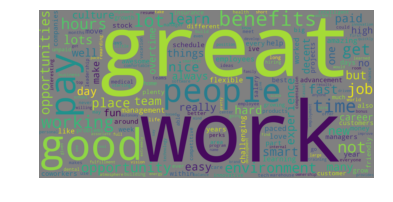

In [43]:
# Word cloud for Amazon pros # (https://github.com/amueller/word_cloud/blob/master/wordcloud/wordcloud.py#L350)
from wordcloud import WordCloud
wordcloud = WordCloud(width = 2000, height = 1000,background_color="grey", min_font_size = 10).generate_from_frequencies(amazon_pro_dic)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [44]:
amazon_con_dic=amazon_con_row_sum.to_dict()

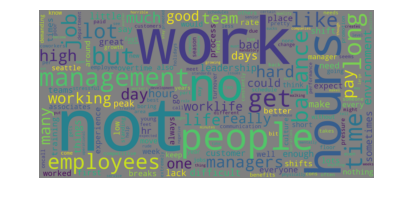

In [45]:
wordcloud = WordCloud(width = 2000, height = 1000,background_color="grey", min_font_size = 10).generate_from_frequencies(amazon_con_dic)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

(-0.5, 999.5, 999.5, -0.5)

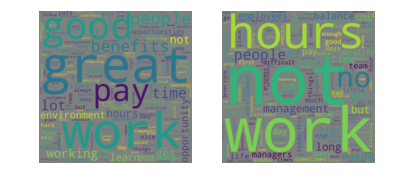

In [46]:
# Amazon pros Vs cons. 
fig = plt.figure()
plt.tight_layout()
ax = fig.add_subplot(1,2,1)
wordcloud_1 = WordCloud(width = 1000, height = 1000,background_color="grey", min_font_size = 10).generate_from_frequencies(amazon_pro_dic)


ax.imshow(wordcloud_1,interpolation='bilinear')
ax.axis('off')
    
ax = fig.add_subplot(1,2,2)
wordcloud_2 = WordCloud(width = 1000, height = 1000,background_color="grey", min_font_size = 10).generate_from_frequencies(amazon_con_dic)

ax.imshow(wordcloud_2,interpolation='bilinear')
ax.axis('off')

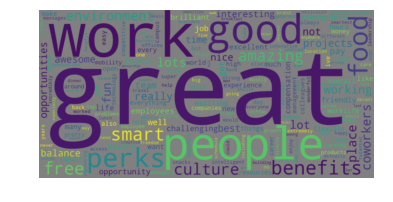

In [47]:
# Google pros word cloud
google_pro_dic=google_pro_row_sum.to_dict()
wordcloud = WordCloud(width = 2000, height = 1000,background_color="grey", min_font_size = 10).generate_from_frequencies(google_pro_dic)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

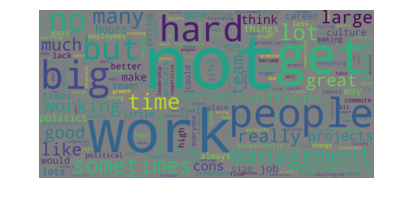

In [48]:
# Google cons word cloud
google_con_dic=google_con_row_sum.to_dict()
wordcloud = WordCloud(width = 2000, height = 1000,background_color="grey", min_font_size = 10).generate_from_frequencies(google_con_dic)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

(-0.5, 499.5, 499.5, -0.5)

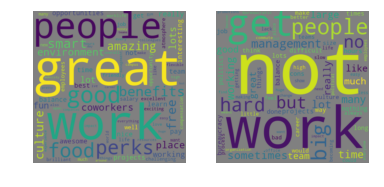

In [49]:
# Google pros Vs cons. 
fig = plt.figure()
plt.tight_layout()
ax = fig.add_subplot(1,2,1)
wordcloud_1 = WordCloud(width = 500, height = 500,background_color="grey", min_font_size = 10).generate_from_frequencies(google_pro_dic)


ax.imshow(wordcloud_1,interpolation='bilinear')
ax.axis('off')
    
ax = fig.add_subplot(1,2,2)
wordcloud_2 = WordCloud(width = 500, height = 500,background_color="grey", min_font_size = 10).generate_from_frequencies(google_con_dic)

ax.imshow(wordcloud_2,interpolation='bilinear')
ax.axis('off')

## Setting up bigrams for all 4 sets of reviews. 

A word is just a single token, often known as a unigram or 1-gram. We already know that the Bag of Words model doesn’t consider order of words. But what if we also wanted to take into account phrases or collection of words which occur in a sequence? N-grams help us achieve that. An N-gram is basically a collection of word tokens from a text document such that these tokens are contiguous and occur in a sequence. Bi-grams indicate n-grams of order 2 (two words), Tri-grams indicate n-grams of order 3 (three words), and so on. The Bag of N-Grams model is hence just an extension of the Bag of Words model so we can also leverage N-gram based features. The following example depicts bi-gram based features in each document feature vector.

In [50]:
# you can set the n-gram range to 1,2 to get unigrams as well as bigrams
amazon_pro_bv = CountVectorizer(ngram_range=(2,2))
amazon_pro_bv_matrix = amazon_pro_bv.fit_transform(amazon_pro_corpus)

In [51]:
# convert the matrix into array
amazon_pro_bv_array = amazon_pro_bv_matrix.toarray()

In [52]:
# get all unique bigram-words in the corpus
vocab = amazon_pro_bv.get_feature_names()
amazon_pro_bv_df= pd.DataFrame(amazon_pro_bv_array, columns=vocab) 

In [53]:
google_pro_bv = CountVectorizer(ngram_range=(2,2))
google_pro_bv_matrix = google_pro_bv.fit_transform(google_pro_corpus)
google_pro_bv_array= google_pro_bv_matrix.toarray()

# get all unique words in the amazon_con_cv corpus
vocab = google_pro_bv.get_feature_names()
# show document feature vectors
google_pro_bv_df=pd.DataFrame(google_pro_bv_array, columns=vocab) 

In [54]:
amazon_con_bv = CountVectorizer(ngram_range=(2,2))
amazon_con_bv_matrix = amazon_con_bv.fit_transform(amazon_con_corpus)
amazon_con_bv_array= amazon_con_bv_matrix.toarray()

# get all unique words in the amazon_con_cv corpus
vocab = amazon_con_bv.get_feature_names()
# show document feature vectors
amazon_con_bv_df=pd.DataFrame(amazon_con_bv_array, columns=vocab) 

In [55]:
google_con_bv = CountVectorizer(ngram_range=(2,2))
google_con_bv_matrix = google_con_bv.fit_transform(google_con_corpus)
google_con_bv_array= google_con_bv_matrix.toarray()

# get all unique words in the amazon_con_cv corpus
vocab = google_con_bv.get_feature_names()
# show document feature vectors
google_con_bv_df=pd.DataFrame(google_con_bv_array, columns=vocab) 

In [56]:
# sum up the frequencies of words in the row. 
amazon_pro_bv_row_sum= amazon_pro_bv_df.sum(axis=0)
amazon_con_bv_row_sum= amazon_con_bv_df.sum(axis=0) 
google_pro_bv_row_sum= google_pro_bv_df.sum(axis=0)
google_con_bv_row_sum= google_con_bv_df.sum(axis=0)

In [57]:
amazon_pro_bv_row_sum.sort_values(ascending=False)[0:15]

good pay            25
great benefits      24
smart people        20
place work          17
good benefits       16
fast paced          16
great place         12
learn lot           12
work environment    11
great pay           11
good work           10
pay good            10
pay great           10
people work         10
pay benefits         9
dtype: int64

In [58]:
amazon_pro_bv_row_sum[0]== 'compensation'


False

In [59]:
amazon_con_bv_row_sum.sort_values(ascending=False)[0:15]

long hours          29
worklife balance    21
work life           21
life balance        20
not enough           9
peak season          8
management not       8
not good             8
high turnover        7
work environment     6
hard work            6
hours long           6
many people          6
work hours           6
not really           6
dtype: int64

In [60]:
google_pro_bv_row_sum.sort_values(ascending=False)[0:15]

smart people        42
free food           41
place work          26
great benefits      22
great perks         20
great work          18
people great        16
work environment    16
great people        16
great place         15
great culture       14
worklife balance    12
people work         12
work life           12
work great          11
dtype: int64

In [61]:
type(google_pro_bv_row_sum)

pandas.core.series.Series

In [62]:
google_con_bv_row_sum.sort_values(ascending=False)[0:15]

not really           11
no cons              10
long hours           10
not think             9
not get               8
middle management     8
work life             8
life balance          8
worklife balance      8
get promoted          7
not many              7
but not               7
things done           7
get things            6
get lost              6
dtype: int64

From the top 15 words in each corpus we see that there are many similar words being used in employee pro and con set of reviews. For example "work environment" and "great place" amazon and google pro reviews. 

We also observe that few words like for example "work environment" are being used negatively in amazon cons reviews whereas they are being used positvely in google pro reivews. 

We also observe that "work life balance" appear in con review sets. 

Amazaon employees have used "fast paced" in pro comments. This is something for human resources to look at in candidates when they are hiring them. 

We can also generate word clouds of these words to see it visually. For that we have to first convert the frequency table into dictionary. 


## Generating Word Clouds 

In [63]:
# Convert it to dictionary
amazon_pro_bv_dic=amazon_pro_bv_row_sum.to_dict()
amazon_con_bv_dic=amazon_con_bv_row_sum.to_dict()
google_pro_bv_dic=google_pro_bv_row_sum.to_dict()
google_con_bv_dic=google_con_bv_row_sum.to_dict()

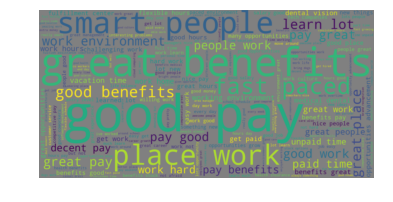

In [64]:
# word cloud of bigarms of amazon pros 
wordcloud = WordCloud(width = 2000, height = 1000,background_color="grey", min_font_size = 10).generate_from_frequencies(amazon_pro_bv_dic)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
wordcloud.to_file("bigram_amazon_pro.png")

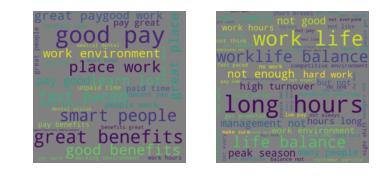

In [65]:
# word cloud of bigarms of amazon pros and cons
fig = plt.figure()
plt.tight_layout()
ax = fig.add_subplot(1,2,1)
wordcloud_1 = WordCloud(width = 500, height = 500,background_color="grey", min_font_size = 10).generate_from_frequencies(amazon_pro_bv_dic)


ax.imshow(wordcloud_1,interpolation='bilinear')
ax.axis('off')
    
ax = fig.add_subplot(1,2,2)
wordcloud_2 = WordCloud(width = 500, height = 500,background_color="grey", min_font_size = 10).generate_from_frequencies(amazon_con_bv_dic)

ax.imshow(wordcloud_2,interpolation='bilinear')
ax.axis('off')
wordcloud.to_file("bigram_amazon_pro_vs_cons.png")

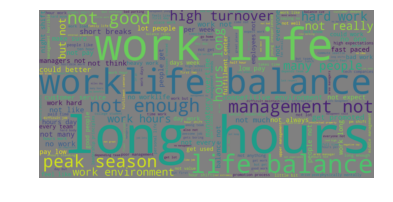

In [66]:
# bigram word cloud of amazon cons
wordcloud = WordCloud(width = 2000, height = 1000,background_color="grey", min_font_size = 10).generate_from_frequencies(amazon_con_bv_dic)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
wordcloud.to_file("bigram_amazon_con.png")

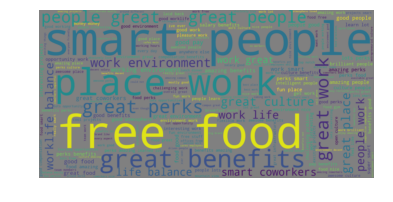

In [67]:
# bigram word cloud of google_pro
wordcloud = WordCloud(width = 2000, height = 1000,background_color="grey", min_font_size = 10).generate_from_frequencies(google_pro_bv_dic)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
wordcloud.to_file("bigram_google_pro.png")

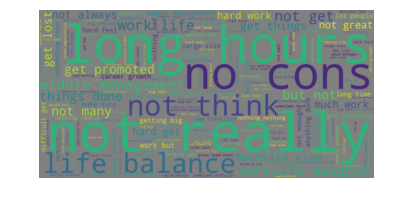

In [68]:
# bigarm word cloud of google_con
wordcloud = WordCloud(width = 2000, height = 1000, background_color="grey", min_font_size = 10).generate_from_frequencies(google_con_bv_dic)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
# Save the image in the img folder:
wordcloud.to_file("bigram_google_con.png")

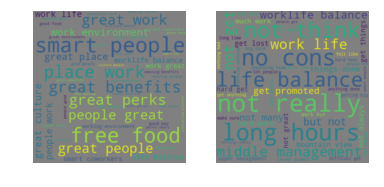

In [69]:
# word cloud of bigarms of google pros and cons
fig = plt.figure()
plt.tight_layout()
ax = fig.add_subplot(1,2,1)
wordcloud_1 = WordCloud(width = 500, height = 500,background_color="grey", min_font_size = 10).generate_from_frequencies(google_pro_bv_dic)


ax.imshow(wordcloud_1,interpolation='bilinear')
ax.axis('off')
    
ax = fig.add_subplot(1,2,2)
wordcloud_2 = WordCloud(width = 500, height = 500,background_color="grey", min_font_size = 10).generate_from_frequencies(google_con_bv_dic)

ax.imshow(wordcloud_2,interpolation='bilinear')
ax.axis('off')
wordcloud.to_file("bigram_google_pro_vs_cons.png")

Word Clouds are nice way to semiquantitaviely visualize the frequency of words in the documents. For quantitativly visualizing the frequencies of bigrams we will be using pyramid plots and bar plots.  

We will create a term frequency-inverse document matrix to see if we can pick words which appear in a set more number of times as compared to other sets. 

## Feature Generation using TF-IDF

In Term Frequency(TF), you just count the number of words occurred in each document. The main issue with this Term Frequency is that it will give more weight to longer documents. Term frequency is basically the output of the BoW model.

IDF(Inverse Document Frequency) measures the amount of information a given word provides across the document. IDF is the logarithmically scaled inverse ratio of the number of documents that contain the word and the total number of documents.

![](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1535125878/NLTK6_pwucct.png)

TF-IDF(Term Frequency-Inverse Document Frequency) normalizes the document term matrix. It is the product of TF and IDF. Word with high tf-idf in a document, it is most of the times occurred in given documents and must be absent in the other documents. So the words must be a signature word.

In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer  

amazon_pro_tv = TfidfVectorizer(ngram_range=(2,2), min_df=0., max_df=1.,  use_idf=True)
amazon_pro_tv_matrix = amazon_pro_tv.fit_transform(amazon_pro_corpus)
amazon_pro_tv_array = amazon_pro_tv_matrix.toarray()

# get all unique words in the amazon_pro_cv corpus
vocab = amazon_pro_tv.get_feature_names()
amazon_pro_tv_df=pd.DataFrame(np.round(amazon_pro_tv_array, 2), columns=vocab)

In [71]:
amazon_pro_tv_df.head()

,ability customer,ability iterate,ability make,ability see,able excel,able make,able move,able reference,able see,able use,...,yes first,yes people,yet meet,young family,young folks,young people,young workers,yr week,yr wks,zone job
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [72]:
# sum up the frequencies of words in the row. 
amazon_pro_tv_row_sum= amazon_pro_bv_df.sum(axis=0)


In [73]:
amazon_con_tv = TfidfVectorizer(ngram_range=(2,2), min_df=0.02, max_df=0.98, use_idf=True) # max_features= 1000,
amazon_con_tv_matrix = amazon_con_tv.fit_transform(amazon_con_corpus)
amazon_con_tv_array = amazon_con_tv_matrix.toarray()

# get all unique words in the amazon_con_cv corpus
vocab = amazon_con_tv.get_feature_names()
amazon_con_tv_df=pd.DataFrame(np.round(amazon_con_tv_array, 2), columns=vocab)

In [74]:
google_pro_tv = TfidfVectorizer(ngram_range=(2,2),min_df=0.015, max_df=0.98, use_idf=True)
google_pro_tv_matrix = google_pro_tv.fit_transform(google_pro_corpus)
google_pro_tv_array = google_pro_tv_matrix.toarray()


# get all unique words in the google_pro_cv corpus
vocab = google_pro_tv.get_feature_names()
# show document feature vectors
google_pro_tv_df = pd.DataFrame(google_pro_tv_array, columns=vocab) 

In [75]:
google_con_tv = TfidfVectorizer(ngram_range=(2,2),min_df=0.015, max_df=0.98, use_idf=True)
google_con_tv_matrix = google_con_tv.fit_transform(google_con_corpus)
google_con_tv_array = google_con_tv_matrix.toarray()

# get all unique words in the google_con_cv corpus
vocab = google_con_tv.get_feature_names()
# show document feature vectors
google_con_tv_df = pd.DataFrame(google_con_tv_array, columns=vocab) 

In [76]:
# moving the words into rows and columns. We will use this for Hierarcheal Clustering. 
amazon_pro_tv_df_1 =amazon_pro_tv_df.transpose()
amazon_pro_tv_df_1.head()

,0,1,2,3,4,5,6,7,8,9,...,486,487,488,489,490,491,492,493,494,495
ability customer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ability iterate,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ability make,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ability see,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
able excel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [77]:
# transpose other 3 tv_df
amazon_con_tv_df_1 =amazon_con_tv_df.transpose()
google_pro_tv_df_1 =google_pro_tv_df.transpose()
google_con_tv_df_1 =google_con_tv_df.transpose()

Getting the top words from the above Tfidf matrix. 

In [78]:
# Amazon pro top 20 words 
indices = np.argsort(amazon_pro_tv.idf_)[::-1]
features = amazon_pro_tv.get_feature_names()
top_n = 20
amazon_pro_top_features = [features[i] for i in indices[:top_n]]
amazon_pro_top_features

['zone job',
 'good atmosphere',
 'good insurance',
 'good half',
 'good group',
 'good got',
 'good give',
 'good get',
 'good experience',
 'good desperate',
 'good customer',
 'good consecutive',
 'good comfortable',
 'good base',
 'good area',
 'good leadership',
 'going work',
 'going tell',
 'going prepared',
 'going lie']

In [79]:
# Amazon con top 20 words 
indices = np.argsort(amazon_con_tv.idf_)[::-1]
features = amazon_con_tv.get_feature_names()
top_n = 20
amazon_con_top_features = [features[i] for i in indices[:top_n]]
amazon_con_top_features

['life balance', 'work life', 'worklife balance', 'long hours']

In [80]:
# Google pro top 20 words
indices = np.argsort(google_pro_tv.idf_)[::-1]
features = google_pro_tv.get_feature_names()
top_n = 20
google_pro_top_features = [features[i] for i in indices[:top_n]]
google_pro_top_features

['work smart',
 'good food',
 'great coworkers',
 'good pay',
 'working environment',
 'life balance',
 'work great',
 'smart coworkers',
 'people work',
 'worklife balance',
 'work life',
 'great culture',
 'great place',
 'people great',
 'great people',
 'work environment',
 'great work',
 'great perks',
 'great benefits',
 'place work']

In [81]:
# Google con top 20 words 
indices = np.argsort(google_con_tv.idf_)[::-1]
features = google_con_tv.get_feature_names()
top_n = 20
google_con_top_features = [features[i] for i in indices[:top_n]]
google_con_top_features

['worklife balance',
 'work life',
 'not get',
 'middle management',
 'life balance',
 'not think',
 'no cons',
 'long hours',
 'not really']

 As we observed in previous analysis similar words appear in Tf-IDF matrix  

### Word relationships in reivews using Hierarchical Clustering

It seems there is a strong indication of long working hours and poor work-life balance in the reviews. As a simple clustering technique, we decide to perform a hierarchical cluster and create a dendrogram to see how connected these phrases are in amazon con reviews. 

In [82]:
from scipy.cluster.hierarchy import dendrogram, linkage,ward 
#from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import pdist  
#amazon_pro_tv_df_1

In [83]:
def ward_hierarchical_clustering(feature_matrix):
    distance = pdist(feature_matrix)  # pdist(X) computes the Euclidean distance between pairs of objects in m-by-n matrix X
    linkage_matrix = linkage(distance, 'ward')  # ward: minimum variance criterion
    return linkage_matrix

In [84]:
amazon_con_tv_array

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

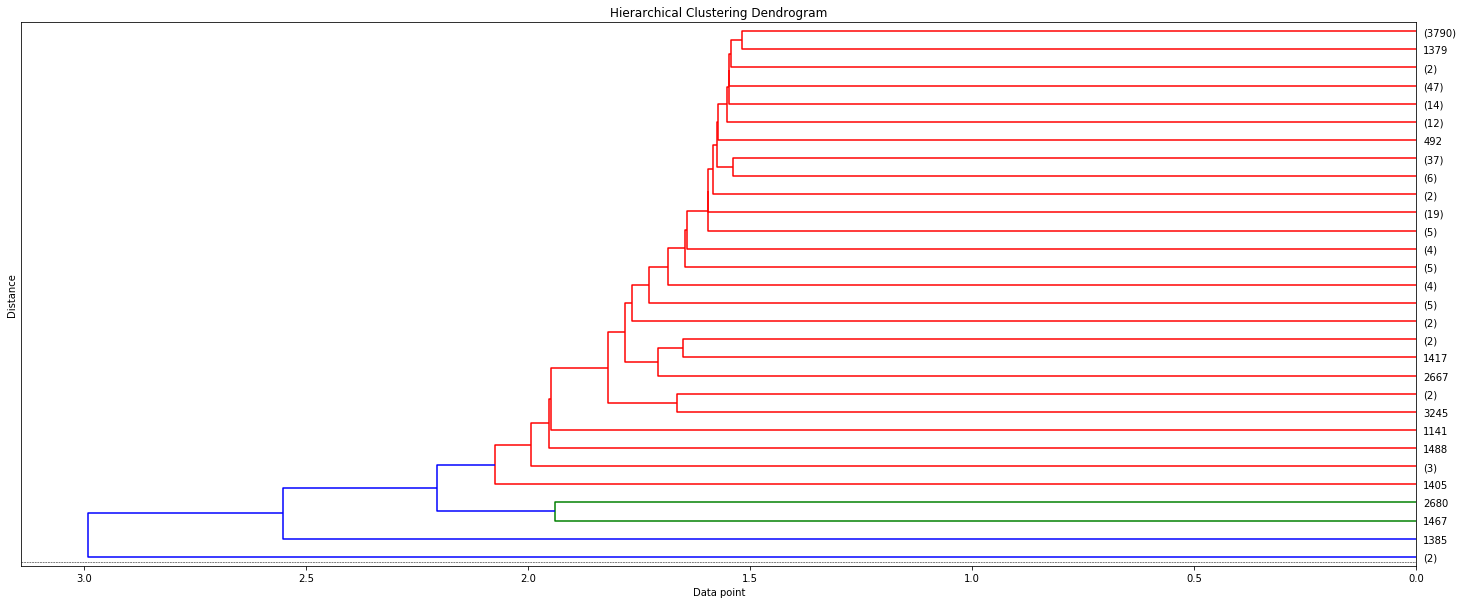

In [85]:
Z = ward_hierarchical_clustering(amazon_pro_tv_df_1)
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z,orientation="left",truncate_mode='lastp')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data point')
plt.ylabel('Distance')
plt.axhline(y=2.0, c='k', ls='--', lw=0.5)

In [86]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer  #(grid search...? pipeline)

amazon_pro_tv = TfidfVectorizer(ngram_range=(2,2), min_df=0.02, max_df=0.98)
amazon_pro_tv_matrix = amazon_pro_tv.fit_transform(amazon_pro_corpus)
amazon_pro_tv_array = amazon_pro_tv_matrix.toarray()

# get all unique words in the amazon_pro_cv corpus
vocab = amazon_pro_tv.get_feature_names()
amazon_pro_tv_df=pd.DataFrame(np.round(amazon_pro_tv_array, 2), columns=vocab)

In [87]:
amazon_pro_tv_df_1 =amazon_pro_tv_df.transpose()

In [88]:
amazon_pro_tv_df_1.head()

,0,1,2,3,4,5,6,7,8,9,...,486,487,488,489,490,491,492,493,494,495
fast paced,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.57,0.0,0.0,0.00,0.0,0.0
good benefits,0.0,0.0,0.0,0.0,0.0,0.67,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.58,0.0,0.0
good pay,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.52,0.0,0.0
good work,0.0,0.0,0.0,0.0,0.0,0.00,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0
great benefits,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,1.0,0.0,0.00,0.0,0.0


In [89]:
Z = ward_hierarchical_clustering(amazon_pro_tv_df_1)

In [90]:
def plot_hierarchical_clusters(linkage_matrix, tdm_df, p=100, figure_size=(10,20)):
    # set size
    fig, ax = plt.subplots(figsize=figure_size) 
    features_names = tdm_df.index.values
    # plot dendrogram
    R = dendrogram(linkage_matrix, orientation="left", labels=features_names,
                    #truncate_mode='lastp', 
                    #p=p,  
                    no_plot=True)
    temp = {R["leaves"][ii]: features_names[ii] for ii in range(len(R["leaves"]))}
    def llf(xx):
        return "{}".format(temp[xx])
    ax = dendrogram(
            linkage_matrix,
            #truncate_mode='lastp',
            orientation="left",
            #p=p,  
            leaf_label_func=llf, 
            leaf_font_size=15.,
            )
    plt.tick_params(axis= 'x',   
                    which='both',  
                    bottom='off',
                    top='off',
                    labelbottom='off')
    plt.tight_layout()
    

/Users/saaketvarma/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/Users/saaketvarma/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/Users/saaketvarma/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


<Figure size 1800x720 with 0 Axes>

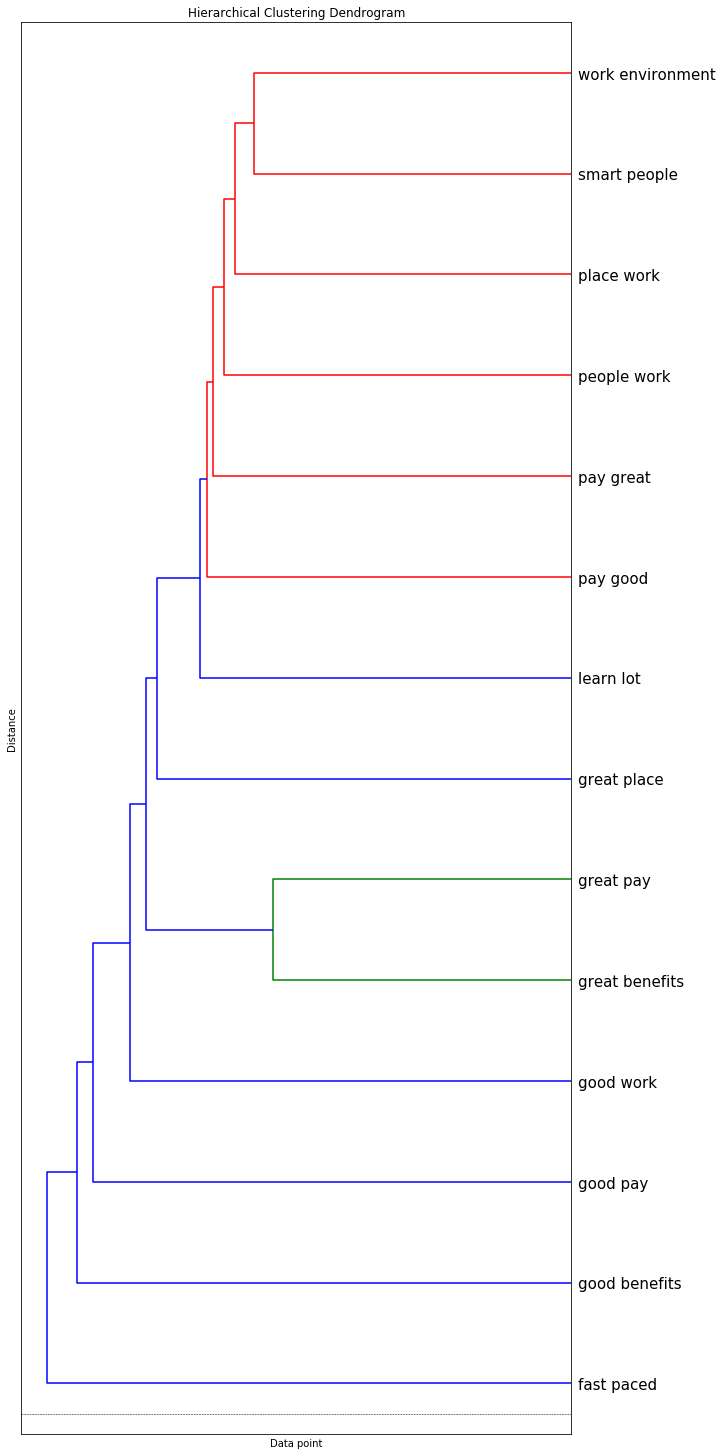

In [91]:
#
fig = plt.figure(figsize=(25, 10))
plot_hierarchical_clusters(Z,amazon_pro_tv_df_1)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data point')
plt.ylabel('Distance')
plt.axhline(y=2.0, c='k', ls='--', lw=0.5)
plt.savefig('Amazon_pros_clusters.png', dpi=200)

In [92]:
# 
amazon_con_tv = CountVectorizer(ngram_range=(2,2), min_df=0.015, max_df=0.98)
amazon_con_tv_matrix = amazon_con_tv.fit_transform(amazon_con_corpus)
amazon_con_tv_array = amazon_con_tv_matrix.toarray()

# get all unique words in the amazon_con_cv corpus
vocab = amazon_con_tv.get_feature_names()
amazon_con_tv_df=pd.DataFrame(np.round(amazon_con_tv_array, 2), columns=vocab)
amazon_con_tv_df_1 =amazon_con_tv_df.transpose()

In [93]:
#
Z = ward_hierarchical_clustering(amazon_con_tv_df_1)

/Users/saaketvarma/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/Users/saaketvarma/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/Users/saaketvarma/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


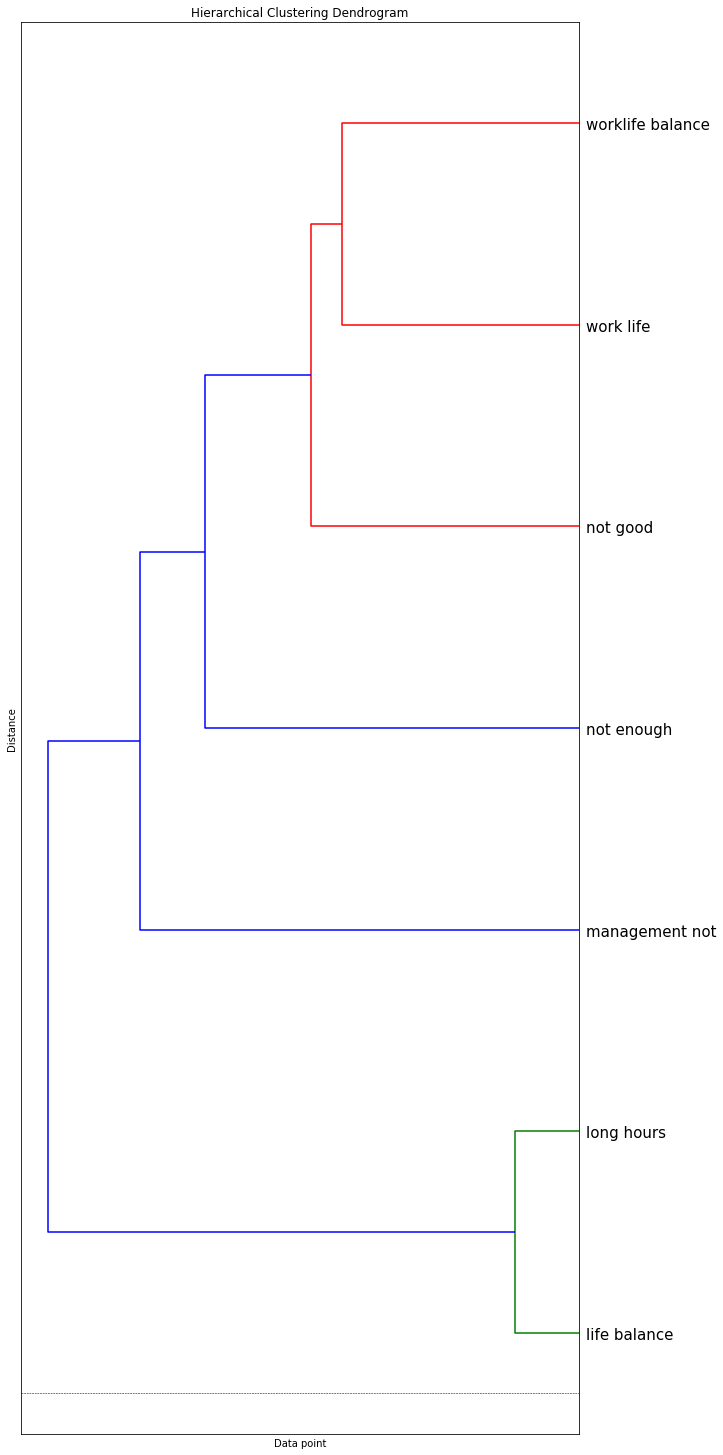

In [94]:
#
plot_hierarchical_clusters(Z,amazon_con_tv_df_1)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data point')
plt.ylabel('Distance')
plt.axhline(y=2.0, c='k', ls='--', lw=0.5)
plt.savefig('Amazon_con_clusters.png', dpi=200)

In [95]:
google_pro_tv = CountVectorizer(ngram_range=(2,2),min_df=0.02, max_df=0.98)
google_pro_tv_matrix = google_pro_tv.fit_transform(google_pro_corpus)
google_pro_tv_array = google_pro_tv_matrix.toarray()


# get all unique words in the google_pro_cv corpus
vocab = google_pro_tv.get_feature_names()
google_pro_tv_df=pd.DataFrame(np.round(google_pro_tv_array, 2), columns=vocab)
google_pro_tv_df_1 =google_pro_tv_df.transpose()

In [96]:
Z = ward_hierarchical_clustering(google_pro_tv_df_1)

/Users/saaketvarma/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/Users/saaketvarma/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/Users/saaketvarma/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


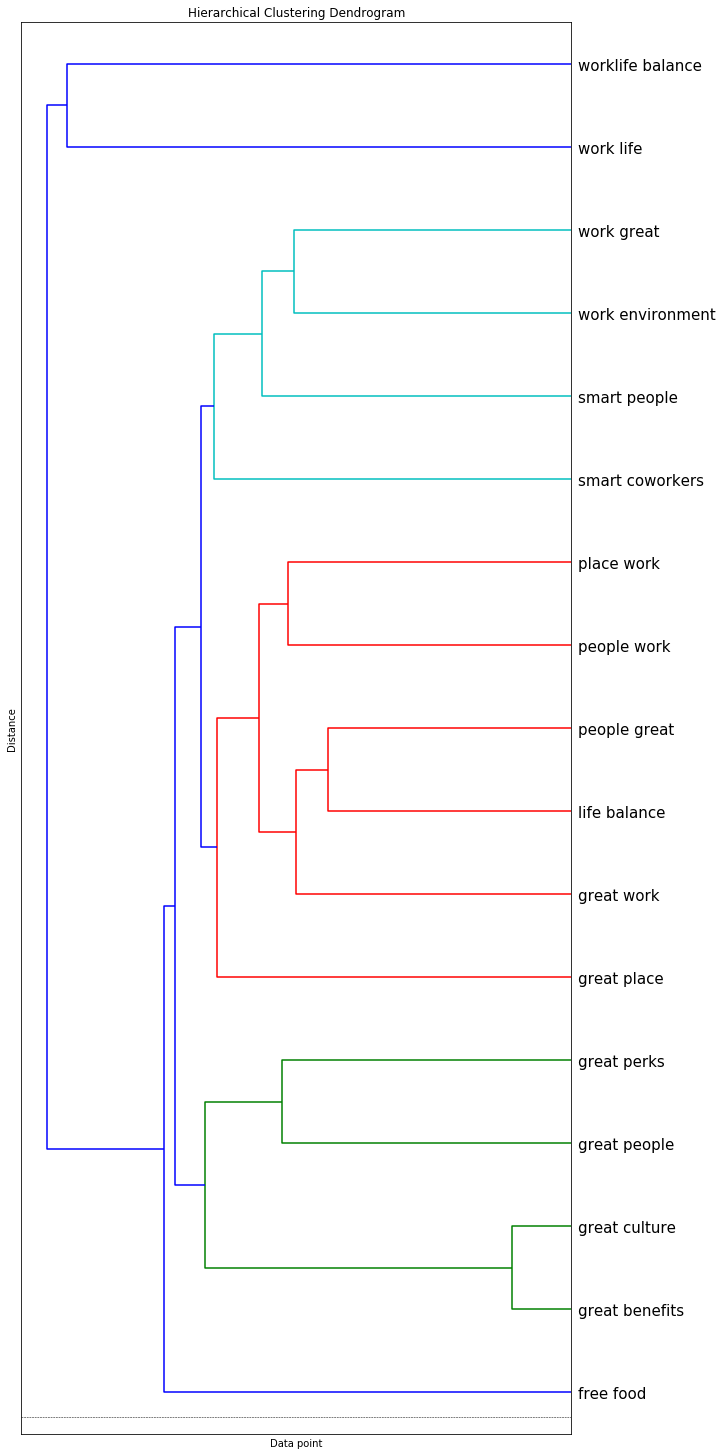

In [97]:
plot_hierarchical_clusters(Z,google_pro_tv_df_1)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data point')
plt.ylabel('Distance')
plt.axhline(y=2.0, c='k', ls='--', lw=0.5)
plt.savefig('Google_pros_clusters.png', dpi=200)

In [98]:
google_pro_tv = CountVectorizer(ngram_range=(2,2),min_df=0.02, max_df=0.98)
google_pro_tv_matrix = google_pro_tv.fit_transform(google_pro_corpus)
google_pro_tv_array = google_pro_tv_matrix.toarray()


# get all unique words in the google_pro_cv corpus
vocab = google_pro_tv.get_feature_names()
google_pro_tv_df=pd.DataFrame(np.round(google_pro_tv_array, 2), columns=vocab)
google_pro_tv_df_1 =google_pro_tv_df.transpose()

In [99]:
google_con_tv = CountVectorizer(ngram_range=(2,2),min_df=0.015, max_df=0.98)
google_con_tv_matrix = google_con_tv.fit_transform(google_con_corpus)
google_con_tv_array = google_con_tv_matrix.toarray()


# get all unique words in the amazon_pro_cv corpus
vocab = google_con_tv.get_feature_names()
google_con_tv_df= pd.DataFrame(np.round(google_con_tv_array, 2), columns=vocab)

In [100]:
google_con_tv_df_1= google_con_tv_df.transpose()

In [101]:
google_con_tv_df_1.head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
life balance,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
long hours,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
middle management,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
no cons,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
not get,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [102]:
Z = ward_hierarchical_clustering(google_con_tv_df_1)

/Users/saaketvarma/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/Users/saaketvarma/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/Users/saaketvarma/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


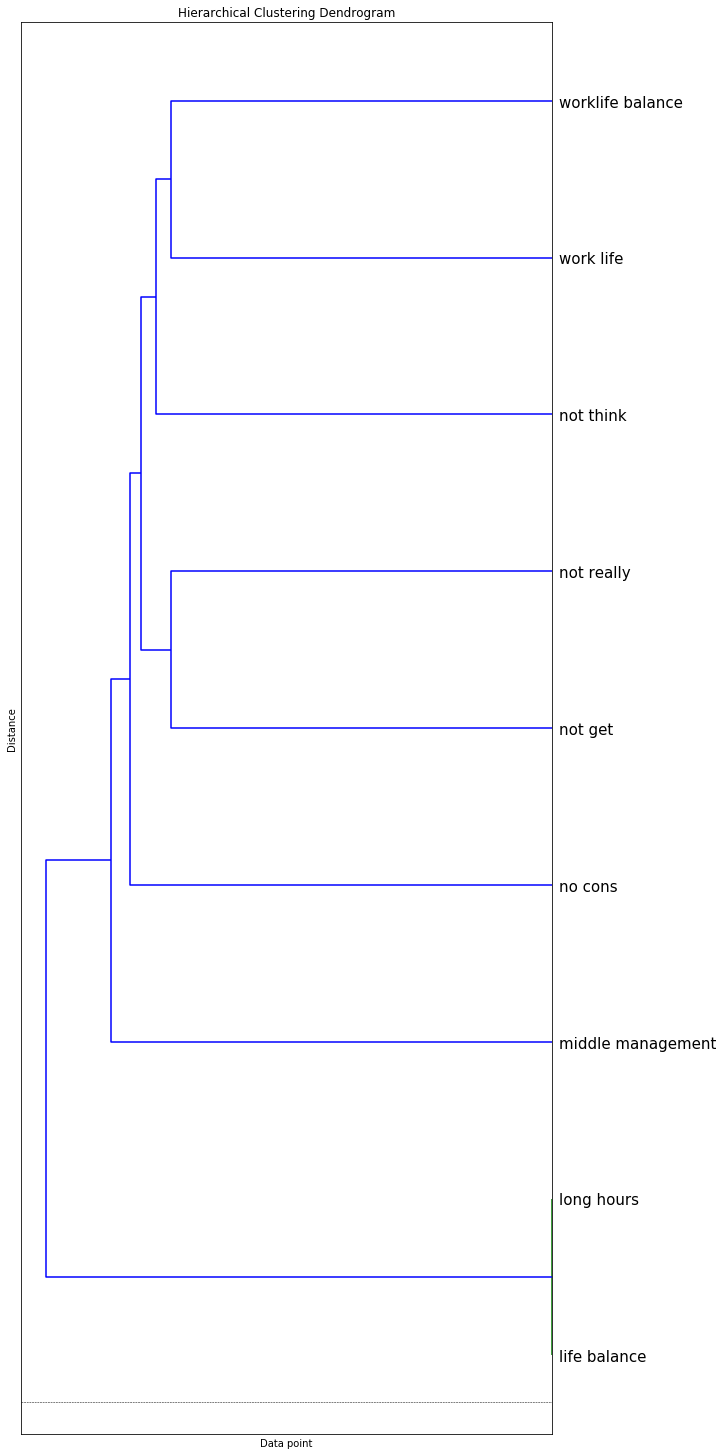

In [103]:
plot_hierarchical_clusters(Z,google_con_tv_df_1)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data point')
plt.ylabel('Distance')
plt.axhline(y=2.0, c='k', ls='--', lw=0.5)
plt.savefig('Google_cons_clusters.png', dpi=200)

## Obervations: 

We do observe, both in amazon and google con reviews that there is a tight clustering between the words, "worklife balance" and "long hours". Employees probably require the management to know that longs hours affect their work-life balance. HR of both companies should probably take a look at it and make necessary adjustments to help their employees maintain that balance without affecting the employee productivty.  

Amazon's positive reviews appear to mention bigrams such as "good benefits", while its negative reviews focus on bigrams such as "work load" and "work-life balance" issues.

In contrast, Google's positive reviews mention "great food", "perks", "smart people", and "fun culture", among other things. Google's negative reviews discuss "politics", "getting big", "bureaucracy", and "middle management".

You decide to make a pyramid plot lining up positive reviews for Amazon and Google so you can compare the differences between any shared bigrams.

## Pyramid plots to show similarities between google reviews and amazon reviews. 

Cage match! Amazon vs. Google pro reviews

1) picking up top 25 bigram frequency table for amazon pros and google pros.
2) join them based on similar bigrams and the frequencies for google and amazon pros. 
3) plot them on the bar plot next to each other. 

In [104]:
# .reset_index() if i use this, here the next codes does not work. ? 

amazon_pro_sort = amazon_pro_bv_row_sum.sort_values(ascending=False)
amazon_con_sort= amazon_con_bv_row_sum.sort_values(ascending=False)
google_pro_sort = google_pro_bv_row_sum.sort_values(ascending=False)
google_con_sort = google_con_bv_row_sum.sort_values(ascending=False)

In [105]:
#
amazon_pro_sort= pd.Series.to_frame(amazon_pro_sort)
amazon_con_sort= pd.Series.to_frame(amazon_con_sort)
google_pro_sort= pd.Series.to_frame(google_pro_sort)
google_con_sort= pd.Series.to_frame(google_con_sort)

In [106]:
#
amazon_pro_sort=amazon_pro_sort.reset_index()
amazon_con_sort=amazon_con_sort.reset_index()
google_pro_sort=google_pro_sort.reset_index()
google_con_sort=google_con_sort.reset_index()

In [107]:
#
amazon_pro_sort= amazon_pro_sort.rename(columns={'index': 'bigrams', 0 : 'frequency'})
amazon_con_sort= amazon_con_sort.rename(columns={'index': 'bigrams', 0 : 'frequency'})
google_pro_sort= google_pro_sort.rename(columns={'index': 'bigrams', 0 : 'frequency'})
google_con_sort= google_con_sort.rename(columns={'index': 'bigrams', 0 : 'frequency'})

In [108]:
# Create common_words
common_words_pros = pd.merge(amazon_pro_sort, google_pro_sort, on='bigrams')
common_words_cons = pd.merge(amazon_con_sort, google_con_sort, on='bigrams')

In [109]:
common_words_pros.head()

,bigrams,frequency_x,frequency_y
0,good pay,25,9
1,great benefits,24,22
2,smart people,20,42
3,place work,17,26
4,good benefits,16,6


In [110]:
common_words_cons.head()

,bigrams,frequency_x,frequency_y
0,long hours,29,10
1,worklife balance,21,8
2,work life,21,8
3,life balance,20,8
4,not enough,9,4


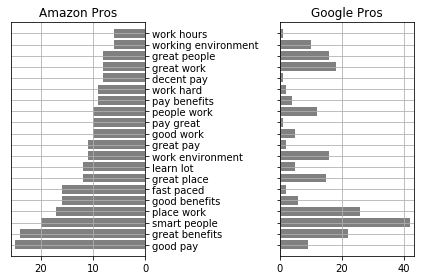

<Figure size 432x288 with 0 Axes>

In [111]:
# plotting pyramid plots
y= range(20)
fig, axes = plt.subplots(ncols=2, sharey=True)
axes[0].barh(y, common_words_pros['frequency_x'][0:20], align='center', color='gray')
axes[0].set(title='Amazon Pros')
axes[1].barh(y, common_words_pros['frequency_y'][0:20], align='center', color='gray')
axes[1].set(title='Google Pros')
axes[0].invert_xaxis()
axes[0].set(yticks=y, yticklabels=common_words_pros['bigrams'][0:20])
axes[0].yaxis.tick_right()
for ax in axes.flat:
    ax.margins(0.03)
    ax.grid(True)

fig.tight_layout()
fig.subplots_adjust(wspace=1)
plt.show()
plt.savefig('Pyramidplt_pros.png', dpi=200)

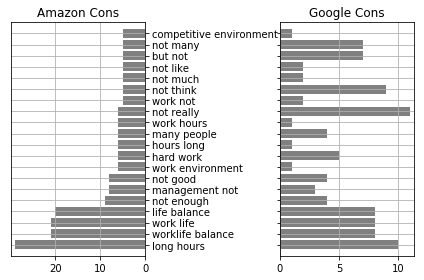

<Figure size 432x288 with 0 Axes>

In [112]:
y= range(20)
fig, axes = plt.subplots(ncols=2, sharey=True)
axes[0].barh(y, common_words_cons['frequency_x'][0:20], align='center', color='gray')
axes[0].set(title='Amazon Cons')
axes[1].barh(y, common_words_cons['frequency_y'][0:20], align='center', color='gray')
axes[1].set(title='Google Cons')
axes[0].invert_xaxis()
axes[0].set(yticks=y, yticklabels=common_words_cons['bigrams'][0:20])
axes[0].yaxis.tick_right()
for ax in axes.flat:
    ax.margins(0.03)
    ax.grid(True)

fig.tight_layout()
fig.subplots_adjust(wspace=1)
plt.show()
plt.savefig('Pyramidplt_cons.png', dpi=200)

We can also predict whether a review is a pro or a con which is usually called Sentiment Analysis. We will use logistic regression, multinomial naive bayes and random forest algorithms to train, test, fit and predict the review as pros or cons. 

## Machine Learning Component 

Basic steps involved in building a model and observing how efficinetly the is able to pick pros or con reviews. 

1. train test split

2. text pre-processing

3. feature engineering - vectorization

4. initialize model 
from sklearn.naive_bayes import NBC....

mnb = NBC...()

5. train the model
mnb.fit(...)

6. predict on the test data
predictions = mnb.predict(test_Features)

7. model evaluation

   a) classification report

   b) confusion matrix

In [113]:
# Required Python Machine learning Packages
import pandas as pd
import numpy as np
# For preprocessing the data
#from sklearn.preprocessing import Imputer
from sklearn import preprocessing
# To split the dataset into train and test datasets
from sklearn.cross_validation import train_test_split

# To model the MultinomialNB Navie Bayes classifier
from sklearn.naive_bayes import MultinomialNB
# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score

In [114]:
#using the master dataframe. we create this earlier. 
master_df_merge.shape

(2002, 2)

In [115]:
#looking at the first 5 rows. 
master_df_merge.head()

,review,label
0,You're surrounded by smart people and the proj...,pro
1,Brand name is great. Have yet to meet somebody...,pro
2,Good money.Interaction with some great minds i...,pro
3,nice pay and overtime and different shifts,pro
4,Opportunity for those not afraid to work!,pro


In [116]:
# dropping na values.
master_df_merge.dropna(inplace=True)
master_df_merge.shape

(1994, 2)

In [117]:

X= master_df_merge['review'].values
y= master_df_merge['label'].values
X,y,X.shape,y.shape

(array(["You're surrounded by smart people and the projects are interesting, if a little daunting.",
        "Brand name is great. Have yet to meet somebody who is unfamiliar with Amazon. Hours weren't as bad as I had previously heard. But i guess can be long for corporate finance",
        "Good money.Interaction with some great minds in the world during internal conferences and sessions.Of course the pride of being a part of earth's most customer centric experience",
        ...,
        'Large corporation, so it has typical big company problems- hard to have career growth, promotions are difficult to get, decent amount of bureaucracy, you are one among many people, etc.',
        'The office space is outdated. Could use new radio equipment.',
        'Sometimes loaded with work and extra hours will be required. You must not get behind or you will definitely have to put in extra hours.'],
       dtype=object),
 array(['pro', 'pro', 'pro', ..., 'con', 'con', 'con'], dtype=object),
 (1

In [118]:
# split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 10)
X_train.shape, X_test.shape

((1335,), (659,))

In [119]:
# remove some stopwords to capture negation in n-grams if possible
stop_words = nltk.corpus.stopwords.words('english')
stop_words.remove('no')
stop_words.remove('not')
stop_words.remove('but')

# load up a simple porter stemmer - nothing fancy
ps = nltk.porter.PorterStemmer()

def simple_text_preprocessor(document): 
    # lower case
    document = str(document).lower()
    
    # expand contractions
    document = contractions.fix(document)
    
    # remove unnecessary characters
    document = re.sub(r'[^a-zA-Z]',r' ', document)
    document = re.sub(r'nbsp', r'', document)
    document = re.sub(' +', ' ', document)
    
    # simple porter stemming   (can close it to get more mean)
    document = ' '.join([ps.stem(word) for word in document.split()])
    
    # stopwords removal
    document = ' '.join([word for word in document.split() if word not in stop_words])
    
    return document

stp = np.vectorize(simple_text_preprocessor)

In [120]:
stp(list(X_train)).shape

(1335,)

In [121]:
# Preprocessing the text
X_train_clean = stp(X_train)
X_test_clean = stp(X_test)

In [124]:
# count vectorizer for entire data frame. use this to predict errors. 
X_cv = cv.transform(X)

In [125]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(min_df=0, max_df=1, ngram_range=(1, 2))
X_traincv = cv.fit_transform(X_train_clean).toarray()
X_traincv = pd.DataFrame(X_traincv, columns=cv.get_feature_names())

X_testcv = cv.transform(X_test_clean).toarray()
X_testcv = pd.DataFrame(X_testcv, columns=cv.get_feature_names())
X_traincv.head()

,abil advanc,abil custom,abil iter,abil see,abil switch,abil work,abl affect,abl excel,abl make,abl refer,...,yoy growth,yr,yr week,yr wk,yummi,yummi free,zero growth,zero job,zone job,zone might
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [126]:
# logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(X_traincv, y_train)
y_pred = logreg.predict(X_testcv)
print("Accuracy of logistic regression classifier on train set: {:0.2f}".format(logreg.score(X_traincv, y_train)))
print('Accuracy of logistic regression classifier on test set: {:0.2f}'.format(logreg.score(X_testcv, y_test)))

Accuracy of logistic regression classifier on train set: 0.96
Accuracy of logistic regression classifier on test set: 0.66


In [127]:
print(metrics.classification_report(y_test, y_pred))  

             precision    recall  f1-score   support

        con       0.80      0.42      0.55       324
        pro       0.62      0.90      0.73       335

avg / total       0.71      0.66      0.64       659



In [128]:
# confusion matrix
print(metrics.confusion_matrix(y_test, y_pred))

[[137 187]
 [ 34 301]]


In [129]:
# Multinomial naive bayes classification 

# build the classifier 
clf = MultinomialNB()

#Fit the model
clf.fit(X_traincv, y_train)

#Predict
y_pred_train = clf.predict(X_traincv) 
y_pred_test = clf.predict(X_testcv)

# Print the accuracy from the testing data.
print("Accuracy on train set: {:0.4f}".format(clf.score(X_traincv, y_train)))
print("Accuracy on test set: {:0.4f}".format(clf.score(X_testcv, y_test)))

Accuracy on train set: 0.9453
Accuracy on test set: 0.6434


In [130]:
print(metrics.classification_report(y_test, clf.predict(X_testcv)))  

             precision    recall  f1-score   support

        con       0.61      0.77      0.68       324
        pro       0.70      0.52      0.60       335

avg / total       0.66      0.64      0.64       659



In [131]:
# confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, clf.predict(X_testcv)))

[[249  75]
 [160 175]]


In [132]:
# random forest             
from sklearn.ensemble import RandomForestClassifier
clf_r = RandomForestClassifier(n_estimators=20)    
clf_r.fit(X_traincv,y_train)

#Predict
y_pred_train = clf_r.predict(X_traincv) 
y_pred_test = clf_r.predict(X_testcv)

rftr_score=clf_r.score(X_traincv,y_train)
rftst_score=clf_r.score(X_testcv,y_test)
print('Training accuracy: {}'.format(rftr_score))
print('Test accuracy: {}'.format(rftst_score))

Training accuracy: 0.9617977528089887
Test accuracy: 0.6054628224582701


In [133]:
print(metrics.classification_report(y_test, clf_r.predict(X_testcv)))  

             precision    recall  f1-score   support

        con       0.86      0.24      0.37       324
        pro       0.57      0.96      0.71       335

avg / total       0.71      0.61      0.55       659



In [134]:
# confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, clf_r.predict(X_testcv)))

[[ 77 247]
 [ 13 322]]


## Grid Search 

Grid search is a technique through which we can come to know the best parameters for a machine learning model.

- It works in an iterative way. For some of the parameters associated with the model you enter some good probable values and the Grid search iterates through each of them and compares the result for each value and then gives you the best parameters which are suited for your model.

In [136]:
from sklearn.grid_search import GridSearchCV
clf1=LogisticRegression()
highest_c={"C":[0.0001,0.001,0.1,1,10,100]}
model=GridSearchCV(clf1,param_grid=highest_c,cv=5,scoring="accuracy")
model.fit(X_traincv, y_train)
model.best_estimator_,model.best_params_,model.best_score_,model.grid_scores_

(LogisticRegression(C=0.0001, class_weight=None, dual=False,
           fit_intercept=True, intercept_scaling=1, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           solver='liblinear', tol=0.0001, verbose=0, warm_start=False),
 {'C': 0.0001},
 0.5041198501872659,
 [mean: 0.50412, std: 0.00075, params: {'C': 0.0001},
  mean: 0.50412, std: 0.00075, params: {'C': 0.001},
  mean: 0.49588, std: 0.00075, params: {'C': 0.1},
  mean: 0.49588, std: 0.00075, params: {'C': 1},
  mean: 0.49588, std: 0.00075, params: {'C': 10},
  mean: 0.49588, std: 0.00075, params: {'C': 100}])

In [138]:
best_accuracy = model.best_score_
best_parameters = model.best_params_

In [139]:
print(best_accuracy), print (best_parameters)

0.5041198501872659
{'C': 0.0001}


(None, None)

In [141]:
from sklearn.grid_search import GridSearchCV
clf_r = RandomForestClassifier()

para_grids = {
            "n_estimators" : [10,50,100],
            "max_features" : ["auto", "log2", "sqrt"],
            "bootstrap"    : [True, False]
        }

model=GridSearchCV(clf_r,param_grid=para_grids,cv=5,scoring="accuracy")
model.fit(X_traincv, y_train)
model.best_estimator_,model.best_params_,model.best_score_,model.grid_scores_

(RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=None, max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
             oob_score=False, random_state=None, verbose=0,
             warm_start=False),
 {'bootstrap': True, 'max_features': 'auto', 'n_estimators': 10},
 0.4958801498127341,
 [mean: 0.49588, std: 0.00075, params: {'bootstrap': True, 'max_features': 'auto', 'n_estimators': 10},
  mean: 0.49588, std: 0.00075, params: {'bootstrap': True, 'max_features': 'auto', 'n_estimators': 50},
  mean: 0.49588, std: 0.00075, params: {'bootstrap': True, 'max_features': 'auto', 'n_estimators': 100},
  mean: 0.49588, std: 0.00075, params: {'bootstrap': True, 'max_features': 'log2', 'n_estimators': 10},
  mean: 0.49588, std: 0.00075, params: {'bootstrap': True, 'max_fea

## What are the strongly predictive features?

We can further predict top features for both pros and cons from the reviews. 

In [213]:
words = np.array(cv.get_feature_names())

x = np.eye(X_testcv.shape[1])
probs = clf.predict_log_proba(x)[:, 0]
ind = np.argsort(probs)

pros = words[ind[:10]]
cons = words[ind[-10:]]

pros_prob = probs[ind[:10]]
cons_prob = probs[ind[-10:]]

print("Pros\t     P(pros | word)")
for w, p in zip(pros, pros_prob):
    print("{:>20}".format(w), "{:.2f}".format(1 - np.exp(p)))
    
print("Cons\t     P(pros | word)")
for w, p in zip(cons, cons_prob):
    print("{:>20}".format(w), "{:.2f}".format(1 - np.exp(p)))
    

Pros	     P(pros | word)
          much learn 0.81
           aw servic 0.77
         tier associ 0.77
          aw partner 0.77
           food food 0.77
               hotel 0.77
             end day 0.77
                  yr 0.77
             greater 0.77
         compani may 0.77
Cons	     P(pros | word)
         balanc role 0.27
        certain part 0.27
         dure school 0.27
           peak time 0.27
       weekend vacat 0.27
        consult oper 0.27
          lip servic 0.27
                 isl 0.22
               women 0.22
           noth noth 0.18


We see that the predictions of pros Vs con words are correctly categorzied as high or low in probability. This suggests that the method worked. The probability determines whether the word is a pro or a con. 
So higher probability suggests that the word high more likely to be pro word.

### Prediction Errors

We can see mis-predictions as well. From the confusion matrix we see that the words were not mis-predicted. Let us get some details about it. 

In [214]:
master_df_merge.shape

(1994, 2)

In [215]:
# use this code to generate list of prediction errors. 
prob = clf.predict_proba(X_cv)[:, 0]   # get the probabilties 
predict = clf.predict(X_cv)

bad_con = np.argsort(prob[y == 'con'])[:5]   #  
bad_pro = np.argsort(prob[y == 'pro'])[-5:]


print("Mis-predicted Con quotes")
print('---------------------------')
for row in bad_con:
    print(master_df_merge[y == 'con'].review.iloc[row])   #create a data frame test records (first col=text, second pro or a con)
    print("")

print("Mis-predicted Pro quotes")
print('--------------------------')
for row in bad_pro:
    print(master_df_merge[y == 'pro'].review.iloc[row])
    print("")

Mis-predicted Con quotes
---------------------------
Google is now a bloated, political organization. Unless you are a software engineer you will learn more elsewhere, and have greater upside at a Facebook or a start-up. HQs are in MTV, outside of there your career stagnates.

There are limited teams in the NY office

I did see any bad about Amazon I had a wonderful time and it was a true blessing to have found a place like Amazon

Dont care about emploies period. Bottom line is the ONLY THING THET MATTERS!!!!! tHhe turn over rate is probably thre highest any where

Workload can be daunting at times when you want to just sit back and relax. Not really that place unless you are super smart.

Mis-predicted Pro quotes
--------------------------
extremely smart co-workers, a lot of resources, excellent perks and working environment, modern internal tools, an innovative and smart environment. if you have an opportunity to work there, there's really little reason not to try it for a few year

# Conclusions

![](figures/3.png)



## 1) Work-life balance rating: 

### Google has better work life balance ratings than Amazon. 

## 2) Compensation:  

### Amazon seems to provide better compensation than Google. 

## 3) Recommendation for Amazon HR:  

### Amazon employees like fast paced environnment. This could be added to their job posting as an essential part of their work culture and set priority for applicants who like the same. 


## Additional codes to test outputs. 

**Creating a bag-of-words in scikit-learn:** the raw text in this column into a bag-of-words representation by creating tokens that contain only alphanumeric characters.


In [216]:
# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (2,2),tokenizer = token.tokenize)
amazon_pros_text_counts= cv.fit_transform(amazon_pros)
google_pros_text_counts= cv.fit_transform(google_pros)
amazon_cons_text_counts= cv.fit_transform(amazon_cons)
google_cons_text_counts= cv.fit_transform(google_cons)

In [217]:
amazon_pros_text_counts

<496x3748 sparse matrix of type '<class 'numpy.int64'>'
	with 4491 stored elements in Compressed Sparse Row format>

In [218]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
amazon_pros_text_tf= tf.fit_transform(amazon_pros)
google_pros__text_tf= tf.fit_transform(google_pros)
amazon_cons_text_tf= tf.fit_transform(amazon_cons)
google_cons__text_tf= tf.fit_transform(google_cons)

In [219]:
amazon_pros_text_tf

<496x1609 sparse matrix of type '<class 'numpy.float64'>'
	with 7877 stored elements in Compressed Sparse Row format>

Word tokenization with NLTK: We will utilize word_tokenize and sent_tokenize from nltk.tokenize to tokenize both words and sentences from Python strings. 


In [220]:
# Import necessary modules
import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/saaketvarma/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [221]:
google_pros[0]

"* If you're a software engineer, you're among the kings of the hill at Google. It's an engineer-driven company without a doubt (that *is* changing, but it's still very engineer-focused)."

***First sentence splitting***

In [222]:
# Split first review of google_pros into sentences: sentences_gp0
sentences_gp0 = sent_tokenize(google_pros[0])

In [223]:
print(sentences_gp0)

["* If you're a software engineer, you're among the kings of the hill at Google.", "It's an engineer-driven company without a doubt (that *is* changing, but it's still very engineer-focused)."]


***Working with column to split all the the sentences***

In [224]:
# Split all review of google_pros into sentences: sentences_gp
sentences_gp = (google_pros.apply(lambda x: sent_tokenize(x)))

In [225]:
print(sentences_gp.head())

0    [* If you're a software engineer, you're among...
1    [1) Food, food, food., 15+ cafes on main campu...
2    [You can't find a more well-regarded company t...
3    [- You drive yourself here., If you want to gr...
4    [Teamwork, always someone who can help, compet...
Name: pros, dtype: object


**Word tokenization**

In [226]:
# Use word_tokenize to tokenize the first sentence: tokenized_sent_gp_o
tokenized_sent_gp_o = word_tokenize(sentences_gp0[0])

In [227]:
print(tokenized_sent_gp_o)

['*', 'If', 'you', "'re", 'a', 'software', 'engineer', ',', 'you', "'re", 'among', 'the', 'kings', 'of', 'the', 'hill', 'at', 'Google', '.']


In [228]:
# Make a set of unique tokens in the first sentence of google_pros column: unique_tokens
unique_tokens_gp_0 = set(word_tokenize(google_pros[0]))

In [229]:
# Print the unique tokens result for first sentence
print(unique_tokens_gp_0)

{'a', 'at', 'It', '.', 'you', "'s", 'of', 'that', 'changing', ',', 'an', '*is*', 'doubt', 'hill', 'very', 'company', 'Google', 'software', 'If', 'engineer-driven', "'re", 'the', 'but', 'among', ')', 'still', 'kings', 'engineer-focused', 'it', 'without', '*', '(', 'engineer'}


In [230]:
 import string
s = [t.translate for t in unique_tokens_gp_0]

In [231]:
from collections import Counter
print(Counter(s))

Counter({<built-in method translate of str object at 0x1097c5730>: 1, <built-in method translate of str object at 0x1a18c79730>: 1, <built-in method translate of str object at 0x1a18c79030>: 1, <built-in method translate of str object at 0x1096efab0>: 1, <built-in method translate of str object at 0x1a1a8c3180>: 1, <built-in method translate of str object at 0x1a18c79e68>: 1, <built-in method translate of str object at 0x1a1a8c36f8>: 1, <built-in method translate of str object at 0x1a18c790a0>: 1, <built-in method translate of str object at 0x1a18cb6570>: 1, <built-in method translate of str object at 0x1098986c0>: 1, <built-in method translate of str object at 0x1a18c799d0>: 1, <built-in method translate of str object at 0x1a18c79378>: 1, <built-in method translate of str object at 0x1a18c79df8>: 1, <built-in method translate of str object at 0x1a1a8c3688>: 1, <built-in method translate of str object at 0x1a18c79110>: 1, <built-in method translate of str object at 0x1a18c79960>: 1, <b

In [232]:
# Convert the tokens into lowercase: lower_tokens
lower_tokens = [t.lower() for t in unique_tokens_gp_0]

In [233]:
# Create a Counter with the lowercase tokens: low_simple
low_simple = Counter(lower_tokens)
# Print the 10 most common tokens
print(low_simple.most_common(10))

[('it', 2), ('a', 1), ('at', 1), ('.', 1), ('you', 1), ("'s", 1), ('of', 1), ('that', 1), ('changing', 1), (',', 1)]


In [234]:
from nltk.probability import FreqDist
fdist = FreqDist(lower_tokens)
print(fdist)

<FreqDist with 32 samples and 33 outcomes>


In [235]:
fdist.most_common(2)

[('it', 2), ('a', 1)]

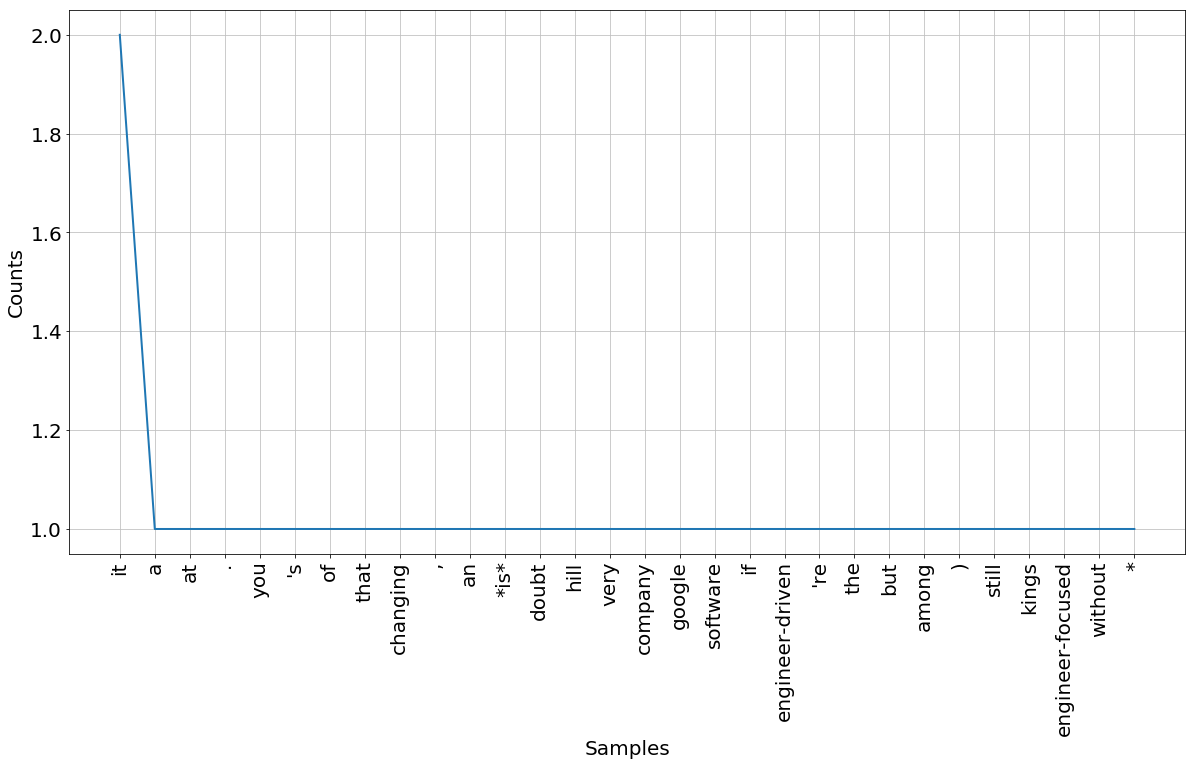

In [236]:
fdist.plot(30,cumulative=False)
plt.show()

As we can see, we need to remove the punctuations and the stop words. 

Preprocessing with Python for stop words, lower casing,lemmatizing. 

In [237]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [238]:
# Retain alphabetic words: alpha_only
alpha_only = [t for t in lower_tokens if t.isalpha]

In [239]:
print(alpha_only)

['a', 'at', 'it', '.', 'you', "'s", 'of', 'that', 'changing', ',', 'an', '*is*', 'doubt', 'hill', 'very', 'company', 'google', 'software', 'if', 'engineer-driven', "'re", 'the', 'but', 'among', ')', 'still', 'kings', 'engineer-focused', 'it', 'without', '*', '(', 'engineer']


In [240]:
nltk.download("stopwords")
stop_words=set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/saaketvarma/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [241]:
# Remove all stop words: no_stops
no_stops = [t for t in alpha_only 
            if t not in stopwords.words('english')]

In [242]:
print(no_stops)

['.', "'s", 'changing', ',', '*is*', 'doubt', 'hill', 'company', 'google', 'software', 'engineer-driven', "'re", 'among', ')', 'still', 'kings', 'engineer-focused', 'without', '*', '(', 'engineer']


**Frequency Distribution**

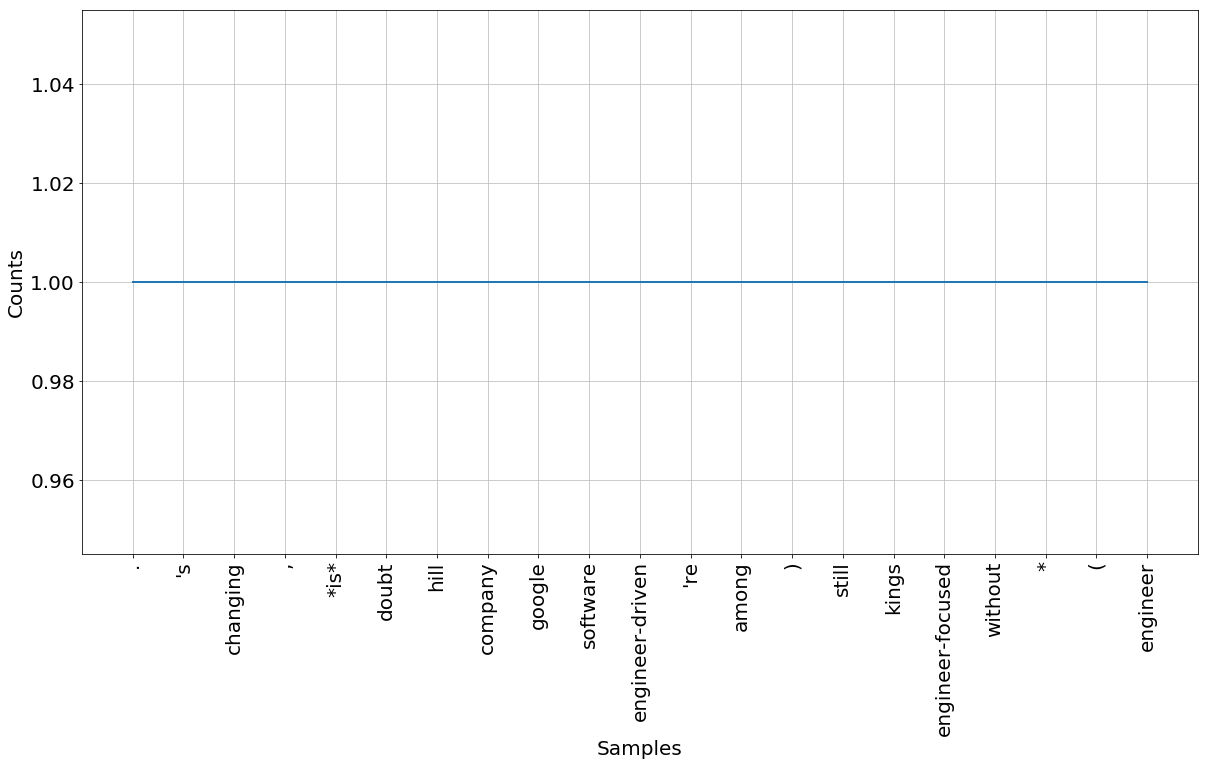

In [243]:
fdist = FreqDist(no_stops)
fdist.plot(30,cumulative=False)
plt.show()

**Lemmatizing**

In [244]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
# Instantiate the WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/saaketvarma/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [245]:
# Lemmatize all tokens into a new list: lemmatized
lemmatized = [wordnet_lemmatizer.lemmatize(t) for t in no_stops]

In [246]:
# Create the bag-of-words: bow
bow = Counter(lemmatized)

# Print the 10 most common tokens
print(bow.most_common(10))


[('.', 1), ("'s", 1), ('changing', 1), (',', 1), ('*is*', 1), ('doubt', 1), ('hill', 1), ('company', 1), ('google', 1), ('software', 1)]


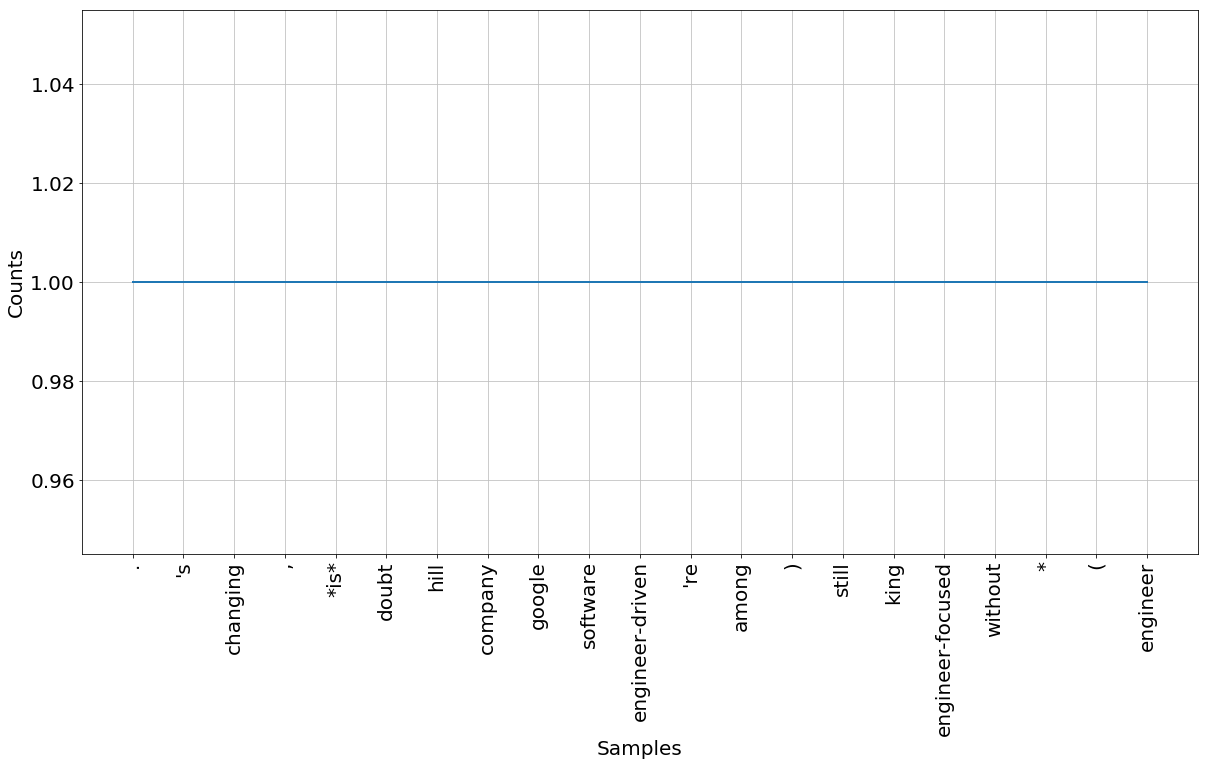

In [247]:
fdist = FreqDist(bow)
fdist.plot(30,cumulative=False)
plt.show()

**POS Tagging:**
The primary target of Part-of-Speech(POS) tagging is to identify the grammatical group of a given word. Whether it is a NOUN, PRONOUN, ADJECTIVE, VERB, ADVERBS, etc. based on the context. POS Tagging looks for relationships within the sentence and assigns a corresponding tag to the word.

In [248]:
nltk.download('averaged_perceptron_tagger')
print(nltk.pos_tag(lemmatized))

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/saaketvarma/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[('.', '.'), ("'s", 'POS'), ('changing', 'NN'), (',', ','), ('*is*', 'NNP'), ('doubt', 'NN'), ('hill', 'NN'), ('company', 'NN'), ('google', 'NN'), ('software', 'NN'), ('engineer-driven', 'JJ'), ("'re", 'VBP'), ('among', 'IN'), (')', ')'), ('still', 'RB'), ('king', 'VBG'), ('engineer-focused', 'JJ'), ('without', 'IN'), ('*', 'NNP'), ('(', '('), ('engineer', 'NN')]
